In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from numpy import mean
from numpy import sqrt
from numpy import concatenate

<p>1) $\xi \in U(0,\theta)$ <br />
ОМП для $\theta: E\xi^k = \frac{\theta^k}{k+1} \Rightarrow \theta_k^{*}=\sqrt[k]{(k+1)\overline{X^k}}$ <br />
Исследуем зависимость СКО оценки от k:

In [2]:
theta = 2
N = 10000
n_iter = 1000
k_max = 100
average_sd = np.empty(shape=(n_iter,k_max))
for i in range(n_iter):
    sd = []
    for k in range(1,k_max+1):
        X =  np.random.uniform(0,theta,(N))
        mean_X = mean(X**k)
        estimate = pow((k+1)*mean_X, 1/float(k))
        sd = concatenate((sd, [(estimate-theta)**2]))
    average_sd[i] = sd
vert = mean(average_sd,axis=0)

In [112]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(vert)+1), y=vert, name='Оценка параметра равномерного распределения',
                         line=dict(color='green', width=2)))
fig.update_layout(title='СКО - k',
                   xaxis_title='k',
                   yaxis_title='СКО')
fig.show()

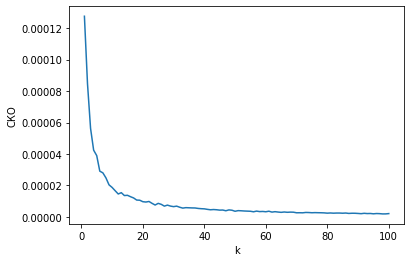

In [3]:
plt.plot(np.arange(1, len(vert)+1), vert)
plt.xlabel('k')
plt.ylabel('СКО')
plt.show()

Вывод: при увеличении k отклонение оценки уменьшается, следовательно, лучше вычислять оценку через момент большего порядка.

<p>2)$\xi \in Exp(\theta)$ <br />
ОМП для $\theta: E\xi^k =\frac{k!}{\theta^k} \Rightarrow \theta_k^{*} =\sqrt[k]{\frac{k!}{\overline{x^k}}} $  <br />
Исследуем зависимость СКО оценки от k:

In [ ]:
_labmda = 2
N = 10000
n_iter = 1000
k_max = 100
average_sd = np.empty(shape=(n_iter,k_max))
for i in range(n_iter):
    sd = []
    for k in range(1,k_max+1):
        X =  np.array([random.expovariate(_lambda) for _ in range(N)])
        mean_X = mean(X**k)
        estimate = pow(math.factorial(k)/mean_X, 1/float(k))
        sd = concatenate((sd, [(estimate-_lambda)**2]))
    average_sd[i] = sd
vert = mean(average_sd,axis=0)

In [ ]:
plt.plot(np.arange(1, len(vert)+1), vert)
plt.xlabel('k')
plt.ylabel('СКО')
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(vert)+1), y=vert, name='Оценка параметра экпоненциального распределения',
                         line=dict(color='green', width=2)))
fig.update_layout(title='СКО - k',
                   xaxis_title='k',
                   yaxis_title='СКО')
fig.show()

Вывод: при увеличении k отклонение оценки увеличивается, следовательно, лучше вычислять оценку через момент меньшего порядка, т.е. k=1.